1 사전 학습된 모델은 어떻게 사용하는가

1.1 VGG - 그냥 일자로~ 깊은 아이

1.2 저 복잡한 아이를 직접 훈련시켜야 하나?

1.3 그런데 이미 학습된 모델을 단지 그냥 사용해 볼 수 있다

In [4]:
pip install opencv-contrib-python # 주요 및 추가 모듈 설치

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 MB 35.4 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
import cv2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [29]:
model = VGG16(weights = 'imagenet')

2023-11-01 18:05:58.737640: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


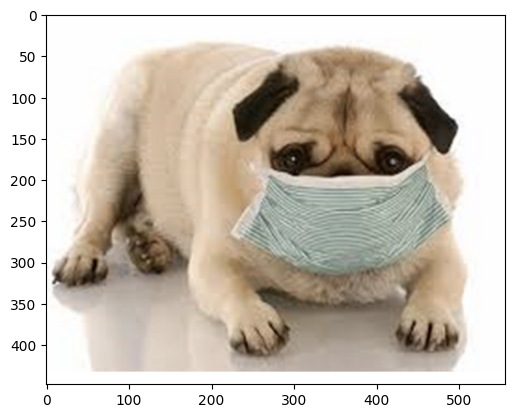

In [30]:
import matplotlib.pyplot as plt

image = cv2.imread("../EDA/data/dog.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

1.9 텐서플로우가 제공하는 전처리 함수 적용

In [31]:
image = cv2.resize(image,dsize =(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

1.10 바로 예측~ pug래.. 응 pug?

In [32]:
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s(%.2f%%)"%(label[1], label[2]*100))

1/1 [==============================] - 0s 99ms/step
pug(82.06%)


1.12 top5 예측 결과

In [33]:
decode_predictions(yhat)


[[('n02110958', 'pug', 0.8205881),
  ('n03803284', 'muzzle', 0.10120891),
  ('n02099712', 'Labrador_retriever', 0.019212605),
  ('n02104029', 'kuvasz', 0.016876085),
  ('n02112706', 'Brabancon_griffon', 0.004944234)]]

In [34]:
import os

path = "../EDA/data/deep_running_data/dogs-vs-cats/train/"
full_names = os.listdir(path)
labels =[each.split('.')[0]for each in full_names]
file_id = [each.split('.')[1]for each in full_names]

1.15 추가 import

In [35]:
import random
import matplotlib.image as mpimg

1.16 이놈~

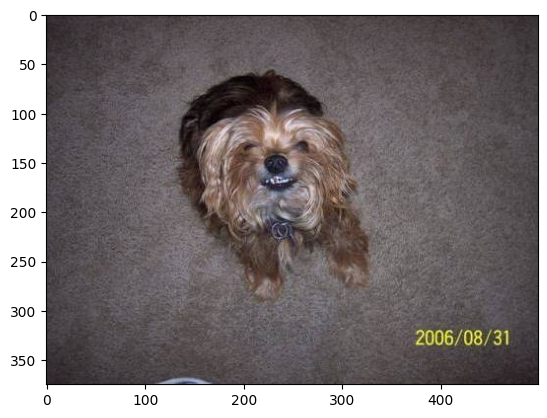

In [36]:
image = mpimg.imread(path + full_names[0])
plt.imshow(image)
plt.show()

In [37]:
image = cv2.resize(image, dsize =(224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print("%s(%.2f%%)"%(label[1], label[2]*100))


1/1 [==============================] - 0s 15ms/step
silky_terrier(30.25%)


1.19 resize 및 preprocessing 함수 하나

In [41]:
def resize_and_preprocess_vgg(image):
    image = cv2.resize(image,dsize=(224,224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0],image.shape[1], image.shape[2]))
    return preprocess_input(image)

In [42]:
def predict_vgg(model, image):
    yhat = model.predict(image)
    label = decode_predictions(yhat)
    return label[0][0][1]

1.21 랜덤하게 6개만 뽑아보자

1/1 [==============================] - 0s 14ms/step


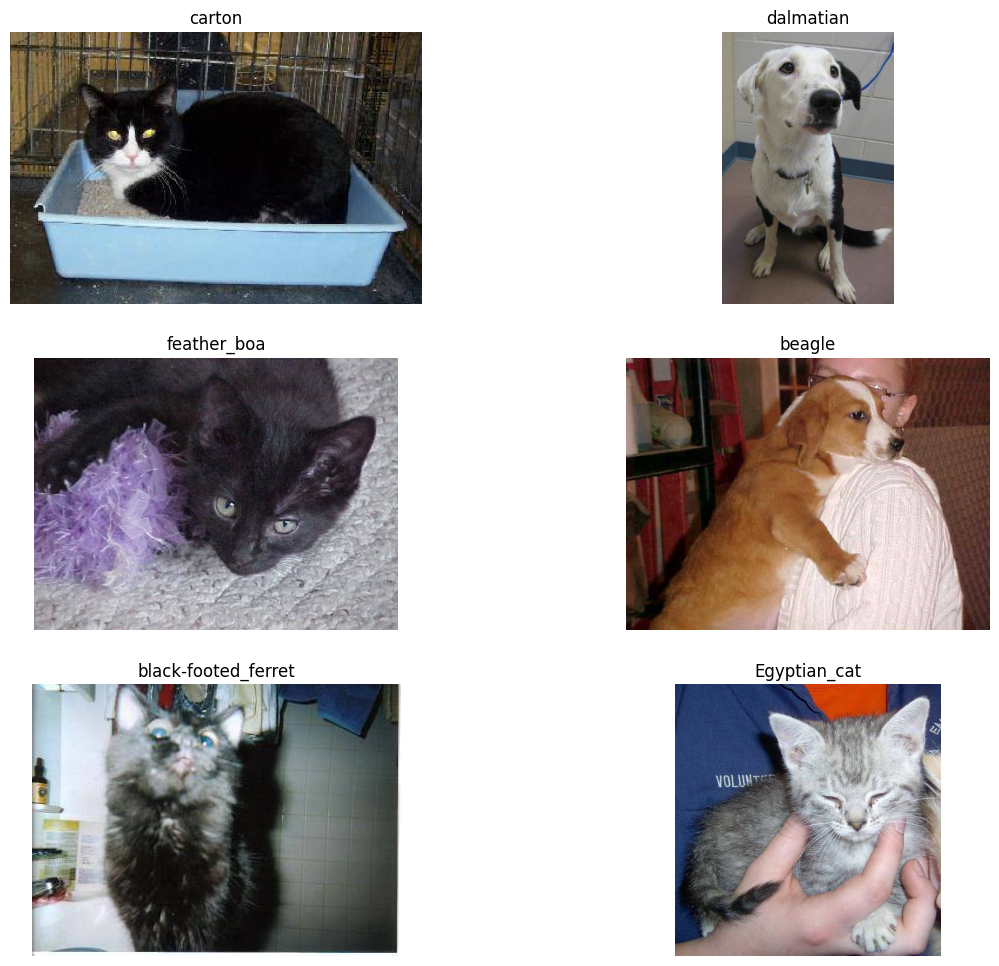

In [43]:
plt.figure(figsize=(14,12))
idx =1
for each in random.choices(full_names, k=6):
    image = mpimg.imread(path + each)
    plt.subplot(3,2,idx)
    idx += 1
    plt.imshow(image)

    image = resize_and_preprocess_vgg(image)
    result = predict_vgg(model, image)

    plt.title(result)
    plt.axis('off')
plt.show()